In [1]:
from my_library.utils import evaluation as Evaluation

In [2]:
kmeans_Model = Evaluation.evaluation.Kmeans('cvs_hcb_member_profiling_preprocessed.csv')

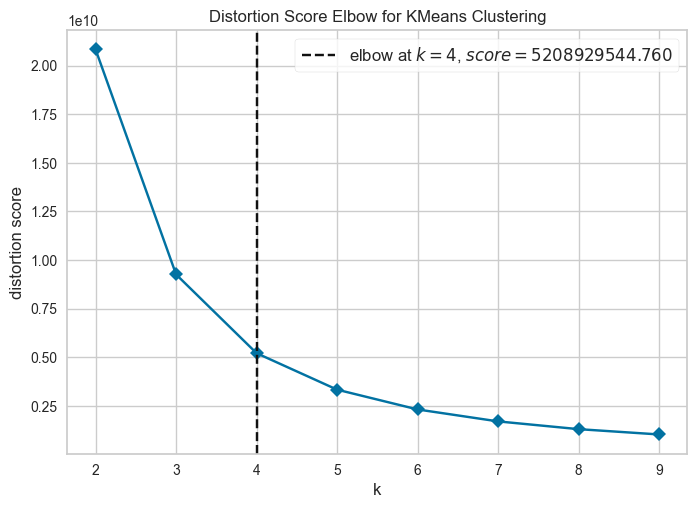

In [3]:
k_n = kmeans_Model.elbow(2, 10)

In [4]:
clusters = kmeans_Model.kmeans(k_n,5,100,0.3)

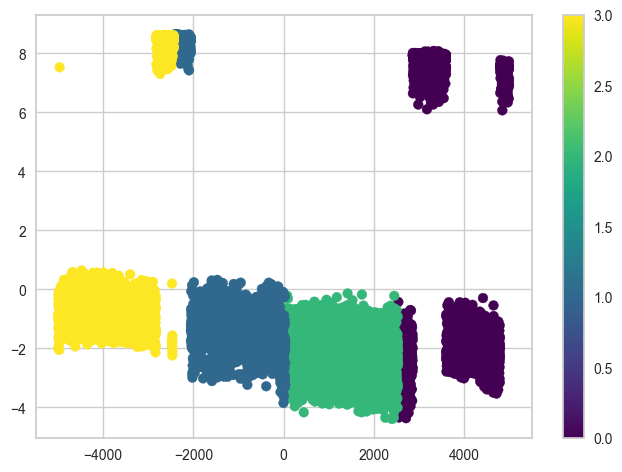

In [5]:
kmeans_Model.scatter_plot(kmeans_Model.pca(clusters))

In [6]:
kmean_score = kmeans_Model.get_scores(clusters)

In [7]:
kmean_distribution = kmeans_Model.get_cluster_distribution(clusters)

In [9]:
hierarchical_Model = Evaluation.evaluation.Hierarchical('cvs_hcb_member_profiling_preprocessed.csv')

In [10]:
folds = 5
params_grid = {"linkage": ["ward", "complete", "average", "single"],
               "n_clusters": list(range(3, 11)),
               "affinity": ["euclidean", "l1", "l2", "manhattan", "cosine"]}

In [11]:
a, b, c = hierarchical_Model.randomizedSearchCV_hierarchical(params_grid, folds)

In [12]:
linkage = b['linkage']
n_clusters = b['n_clusters']
affinity = b['affinity']
print("recommended parameters: ", linkage, n_clusters, affinity)

recommended parameters:  average 4 l1


In [13]:
clusters, data = hierarchical_Model.hierarchical(n_clusters,linkage, affinity, 0.3)

In [14]:
clusters = hierarchical_Model.knn(data, clusters)

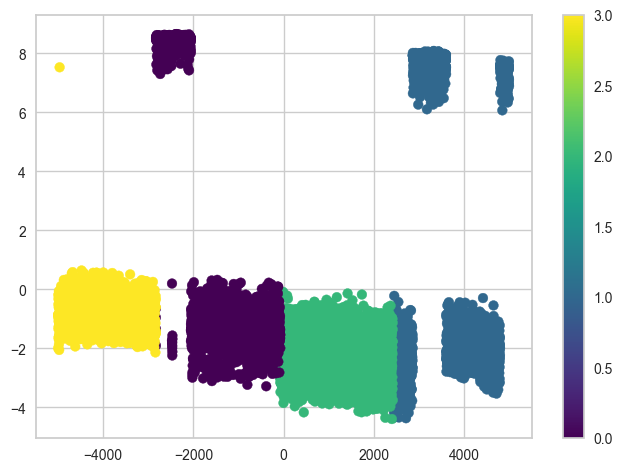

In [15]:
hierarchical_Model.scatter_plot(hierarchical_Model.pca(clusters))

In [16]:
hierarchical_score = hierarchical_Model.get_scores(clusters)

In [17]:
hierarchical_distribution = hierarchical_Model.get_cluster_distribution(clusters)

In [18]:
hierarchical_Model.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,6453.000000,-0.169668,0.047356,-0.150848,-0.151660,-0.317878,0.034348,-0.388742,-0.264752,-0.127291,-0.185308,0.019327,-0.119623,-0.027178,-0.109792,-0.164597,-0.140562,-0.133997,-0.064178,0.205036,-0.406120,-0.022754,0.281460,-0.495825,-0.061583,0.212307,0.313734,0.281460,0.281460,0.281460,-0.029827,-0.104612,-0.205898,0.281460,-0.346897,-0.160922,-0.199447,0.281460,-0.511182,0.136349,0.281460,-0.082281,0.281460,0.281460,0.281460,0.281460,-0.231974,0.504775,0.084137,-0.095805,-0.058089,0.151463,0.018419,0.153883,-0.206680,0
1,1289.000388,0.118961,-0.017351,0.023605,-0.106375,0.364334,0.013641,0.343431,-0.007140,0.372162,-0.077183,-0.042160,0.059166,0.172757,0.093365,-0.124894,0.075922,0.110557,-0.117943,-0.630525,1.182073,0.061914,0.516844,0.004004,-0.118250,0.421844,-0.227658,0.516844,0.516844,0.516844,-0.002339,-0.212032,-0.232215,0.516844,0.299630,-0.142905,-0.195478,0.516844,0.015085,0.271573,0.516844,-0.081835,0.516844,0.516844,0.516844,0.516844,0.020989,0.193624,-0.126864,-0.003323,0.038501,-0.031507,0.088744,0.123171,-0.232000,1
2,3825.499599,0.336901,-0.114144,0.359180,-0.543744,0.711869,-0.123621,0.663627,0.378537,0.843154,-0.080227,0.229966,0.295742,-0.114465,0.298300,-0.140130,0.176013,0.226786,0.260271,-0.229814,-0.071237,-0.080227,-0.453371,0.968083,0.258589,-0.334279,0.159945,-0.453371,-0.453371,-0.453371,-0.133954,0.111452,0.838612,-0.453371,0.272963,0.471120,0.768539,-0.453371,0.987091,-0.150928,-0.453371,0.096176,-0.453371,-0.453371,-0.453371,-0.453371,0.452402,-0.517009,0.013951,0.095729,-0.013005,-0.086882,-0.100709,-0.605880,0.839112,2
3,8916.500000,-0.313287,0.091723,-0.249391,0.946063,-0.848273,0.082315,-0.677507,-0.089878,-1.251700,0.420488,-0.239228,-0.258491,-0.039255,-0.314688,0.519870,-0.113890,-0.221960,-0.077445,0.754005,-0.807758,0.047660,-0.452144,-0.487420,-0.078451,-0.388007,-0.313015,-0.452144,-0.452144,-0.452144,0.195045,0.257480,-0.426653,-0.452144,-0.228871,-0.167181,-0.397934,-0.452144,-0.502925,-0.323375,-0.452144,0.091582,-0.452144,-0.452144,-0.452144,-0.452144,-0.250204,-0.278679,0.027741,0.015853,0.043178,-0.055516,-0.013185,0.354818,-0.426490,3


In [19]:
gmm_Model = Evaluation.evaluation.GMM('cvs_hcb_member_profiling_preprocessed.csv')

In [20]:
a, b, c = gmm_Model.randomizedSearchCV_gmm(
    {'n_components': list(range(3, 11)), 'covariance_type': ['full', 'tied', 'diag', 'spherical'],
     'init_params': ['kmeans', 'random']}, cv=5, n_iter=10, rand_sample_prop=0.2)

In [21]:
n_components = b['n_components']
covariance_type = b['covariance_type']
init_params = b['init_params']

In [22]:
print("recommended parameters: n_components = {}, covariance_type = {}, init_params = {}".format(n_components, covariance_type, init_params))

recommended parameters: n_components = 3, covariance_type = spherical, init_params = random


In [23]:
clusters = gmm_Model.gmm(n_components, covariance_type, init_params, 0.3)

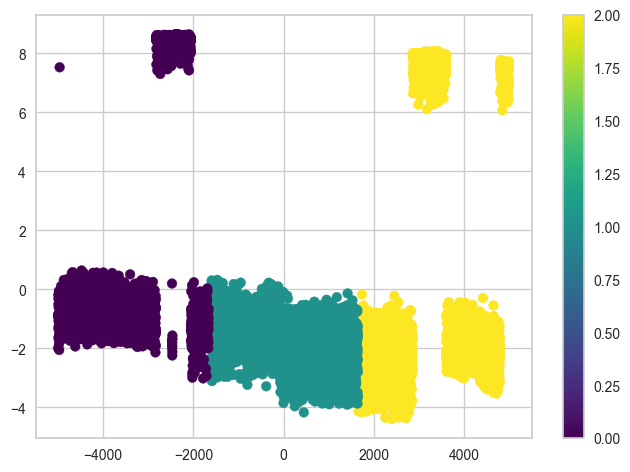

In [24]:
gmm_Model.scatter_plot(gmm_Model.pca(clusters))

In [25]:
gmm_score = gmm_Model.get_scores(clusters)

In [26]:
gmm_distribution = gmm_Model.get_cluster_distribution(clusters)

In [27]:
gmm_Model.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,8331.5,-0.244473,0.068857,-0.195966,0.641163,-0.615837,0.055949,-0.496520,-0.112526,-0.967392,0.238938,-0.145487,-0.200247,-0.076925,-0.235968,0.313249,-0.101376,-0.163891,-0.159962,0.208977,-0.826608,-0.033028,0.155600,-0.487781,-0.161066,0.112641,-0.118118,0.155600,0.155600,0.155600,0.050860,-0.028610,-0.390112,0.155600,-0.264295,-0.249845,-0.362716,0.155600,-0.503279,0.032577,0.155600,-0.058806,0.155600,0.155600,0.155600,0.155600,-0.261334,0.115841,0.038829,-0.011856,-0.040245,0.048736,-0.028922,0.336691,-0.389939,0
1,5006.5,-0.047571,-0.037077,0.034244,-0.440521,0.056121,-0.050929,-0.091682,-0.009951,0.471618,-0.173849,0.118669,0.004079,-0.036160,0.018852,-0.194661,-0.035159,-0.096600,0.198379,0.471003,-0.071237,-0.002899,-0.453371,0.270076,0.200872,-0.359613,0.262232,-0.453371,-0.453371,-0.453371,-0.026513,0.165648,0.390946,-0.453371,-0.322441,0.262564,0.349899,-0.453371,0.267216,-0.210197,-0.453371,0.093463,-0.453371,-0.453371,-0.453371,-0.453371,0.083578,-0.136470,0.058760,-0.013227,0.024076,-0.008209,-0.010863,-0.308169,0.390491,1
2,1674.5,0.290512,-0.031891,0.161271,-0.202696,0.557746,-0.005334,0.585142,0.121900,0.496800,-0.065958,0.027486,0.195375,0.112376,0.216333,-0.119371,0.135734,0.258768,-0.036954,-0.674045,0.893624,0.035758,0.293549,0.218568,-0.038320,0.243579,-0.141790,0.293549,0.293549,0.293549,-0.024420,-0.135378,0.001737,0.293549,0.582166,-0.010941,0.015061,0.293549,0.236831,0.175497,0.293549,-0.033898,0.293549,0.293549,0.293549,0.293549,0.177563,0.019646,-0.096795,0.024891,0.016260,-0.040411,0.039547,-0.030426,0.002014,2


In [28]:
birch_Model = Evaluation.evaluation.birch('cvs_hcb_member_profiling_preprocessed.csv')

In [29]:
folds = 5
params_grid = {"branching_factor": [50, 100, 200, 300, 400, 500],
               "n_clusters": list(range(3, 11)),
               "threshold": [0.2, 0.3, 0.4, 0.5]}

In [30]:
a, b, c = birch_Model.randomizedSearchCV_birch(params_grid, folds, n_iter=10, rand_sample_prop=0.2)

In [31]:
branching_factor = b['branching_factor']
n_clusters = b['n_clusters']
threshold = b['threshold']

In [32]:
print("recommended parameters: branching_factor = {}, n_clusters = {}, threshold = {}".format(branching_factor, n_clusters, threshold))

recommended parameters: branching_factor = 100, n_clusters = 4, threshold = 0.4


In [33]:
clusters = birch_Model.birch(branching_factor, n_clusters, threshold, 0.3)

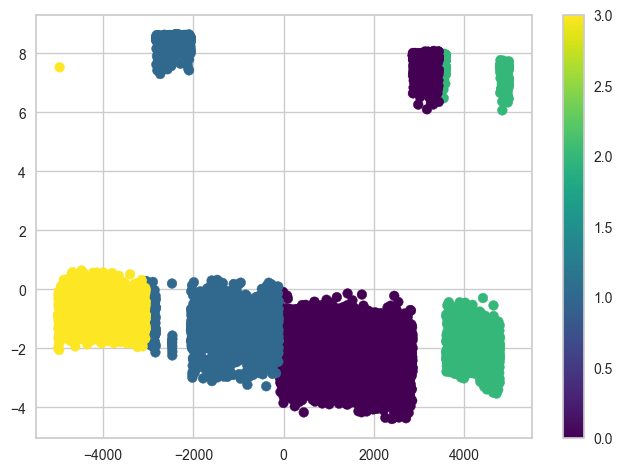

In [34]:
birch_Model.scatter_plot(birch_Model.pca(clusters))

In [35]:
birch_score = birch_Model.get_scores(clusters)

In [36]:
birch_Model.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,3329.5,0.316931,-0.095141,0.324553,-0.527779,0.640896,-0.101816,0.643440,0.313987,0.742985,-0.075516,0.170110,0.267838,-0.109993,0.283788,-0.120398,0.164724,0.226181,0.165666,-0.533854,-0.071237,-0.037343,-0.016931,0.707527,0.164914,0.003697,0.227583,-0.016931,-0.016931,-0.016931,-0.139335,-0.053446,0.602916,-0.016931,0.329608,0.327543,0.567029,-0.016931,0.724275,0.059862,-0.016931,0.029930,-0.016931,-0.016931,-0.016931,-0.016931,0.348875,-0.268023,0.013472,0.051750,-0.006913,-0.047074,-0.020966,-0.473111,0.603353,0
1,6579.5,-0.151741,0.061442,-0.136763,-0.068324,-0.267027,0.060367,-0.322356,-0.220725,-0.205789,-0.141290,0.003850,-0.113104,-0.029799,-0.120778,-0.115811,-0.124357,-0.098440,-0.063415,0.156791,-0.442474,-0.018763,0.234848,-0.491089,-0.061419,0.176460,0.262524,0.234848,0.234848,0.234848,-0.017042,-0.080099,-0.222721,0.234848,-0.258171,-0.158397,-0.215077,0.234848,-0.507361,0.106557,0.234848,-0.072523,0.234848,0.234848,0.234848,0.234848,-0.217160,0.436598,0.070739,-0.088098,-0.053943,0.139757,0.010580,0.173160,-0.223443,1
2,776.5,0.009601,0.009388,-0.129919,0.152144,0.274462,0.056721,0.155693,-0.134368,0.275810,-0.096467,-0.092863,-0.044116,0.362689,-0.017169,-0.165408,0.031123,0.023224,-0.157170,-0.174951,2.008741,0.058752,0.159207,-0.067536,-0.157645,0.144896,-0.635612,0.159207,0.159207,0.159207,0.106090,-0.049733,-0.421305,0.159207,0.174316,-0.228968,-0.389932,0.159207,-0.057246,0.069410,0.159207,-0.045458,0.159207,0.159207,0.159207,0.159207,-0.043451,0.104860,-0.218765,0.033312,0.049603,-0.079343,0.033673,0.316368,-0.421140,2
3,9026.5,-0.356283,0.073082,-0.281470,0.945353,-0.984472,0.049097,-0.810453,-0.131437,-1.264659,0.428912,-0.242175,-0.282309,-0.043718,-0.321316,0.527291,-0.137132,-0.282262,-0.080808,0.876620,-0.803770,0.049668,-0.452005,-0.493553,-0.082081,-0.389776,-0.305526,-0.452005,-0.452005,-0.452005,0.195422,0.258610,-0.426653,-0.452005,-0.349727,-0.175057,-0.397783,-0.452005,-0.507690,-0.326116,-0.452005,0.091536,-0.452005,-0.452005,-0.452005,-0.452005,-0.273120,-0.255923,0.042943,0.012400,0.054725,-0.062434,-0.004648,0.348602,-0.426490,3


In [37]:
birch_distribution = birch_Model.get_cluster_distribution(clusters)

In [38]:
score_table = Evaluation.get_score_table(kmean_score, hierarchical_score, gmm_score, birch_score)

In [39]:
ranked_score_table = Evaluation.sort_score_table(score_table)

In [40]:
ranked_score_table

,Model,Silhouette,Davies Bouldin,n_clusters,Rank
2,GMM,0.589921,0.500059,3,1.0
0,KMeans,0.571554,0.500089,4,2.0
1,Hierarchical,0.566538,0.500086,4,2.0
3,Birch,0.514134,0.500090,4,3.0


In [41]:
distribution_table = Evaluation.get_distribution_table(kmean_distribution, hierarchical_distribution, gmm_distribution, birch_distribution)

In [42]:
distribution_table

,cluster,count,percentage,Model
0,0,2461,24.61,Kmeans
1,1,2471,24.71,Kmeans
2,2,2501,25.01,Kmeans
3,3,2567,25.67,Kmeans
4,0,2761,27.61,Hierarchical
5,1,2579,25.79,Hierarchical
6,2,2494,24.94,Hierarchical
7,3,2166,21.66,Hierarchical
8,0,3336,33.36,GMM
9,1,3314,33.14,GMM


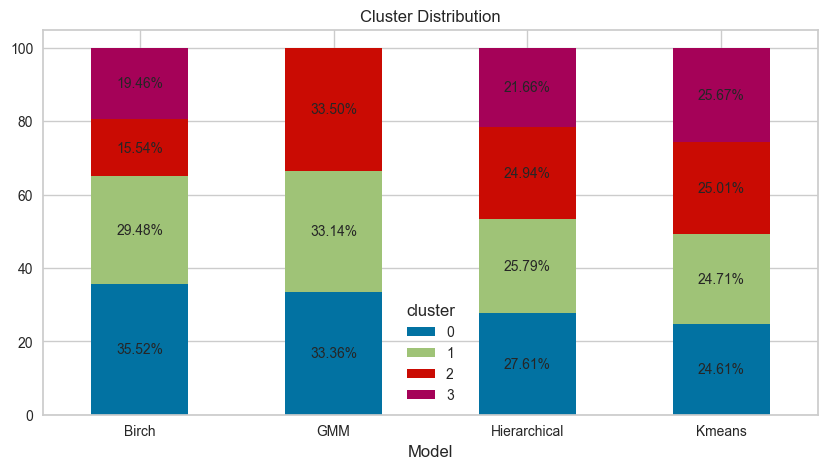

In [43]:
Evaluation.get_distribution_graph(distribution_table)